In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys

import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid
from torch.utils.data import Subset

In [2]:
ROOT_PATH = Path.cwd().parent
DATA_PATH = ROOT_PATH / "data"
sys.path.append(ROOT_PATH.as_posix())

VAL_SIZE = 0.2
BATCH_SIZE = 32
SEED = 42

In [3]:
from src.data import LeafDataset
from src.augmentation import get_augmentations

In [4]:
config = {
    "image_size": 256,
    "p_augment": 0.5,
    "crop_scale": (0.1, 1),
    "gr_shuffle": (3, 3),
    "ssr": (0.05, 0.05, 360),
    "huesat": (20, 20, 20),
    "bricon": (0.1, 0.1),
    "clahe": (0, 1),
    "blur_limit": 3,
    "dist_limit": 0.1,
    "cutout": (5, 0.1),
}

In [5]:
train_augs, test_augs = get_augmentations(**config)

/Users/philippmoehl/anaconda3/envs/plants/lib/python3.10/site-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(
/Users/philippmoehl/anaconda3/envs/plants/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [6]:
train_dataset = LeafDataset(DATA_PATH, transform=train_augs)
val_dataset = LeafDataset(DATA_PATH, transform=test_augs)

idx = list(range(len(train_dataset)))
train_indices, val_indices = train_test_split(idx, test_size=VAL_SIZE, random_state=SEED)

train_dataset = Subset(train_dataset, train_indices)
val_dataset = Subset(val_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

In [7]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

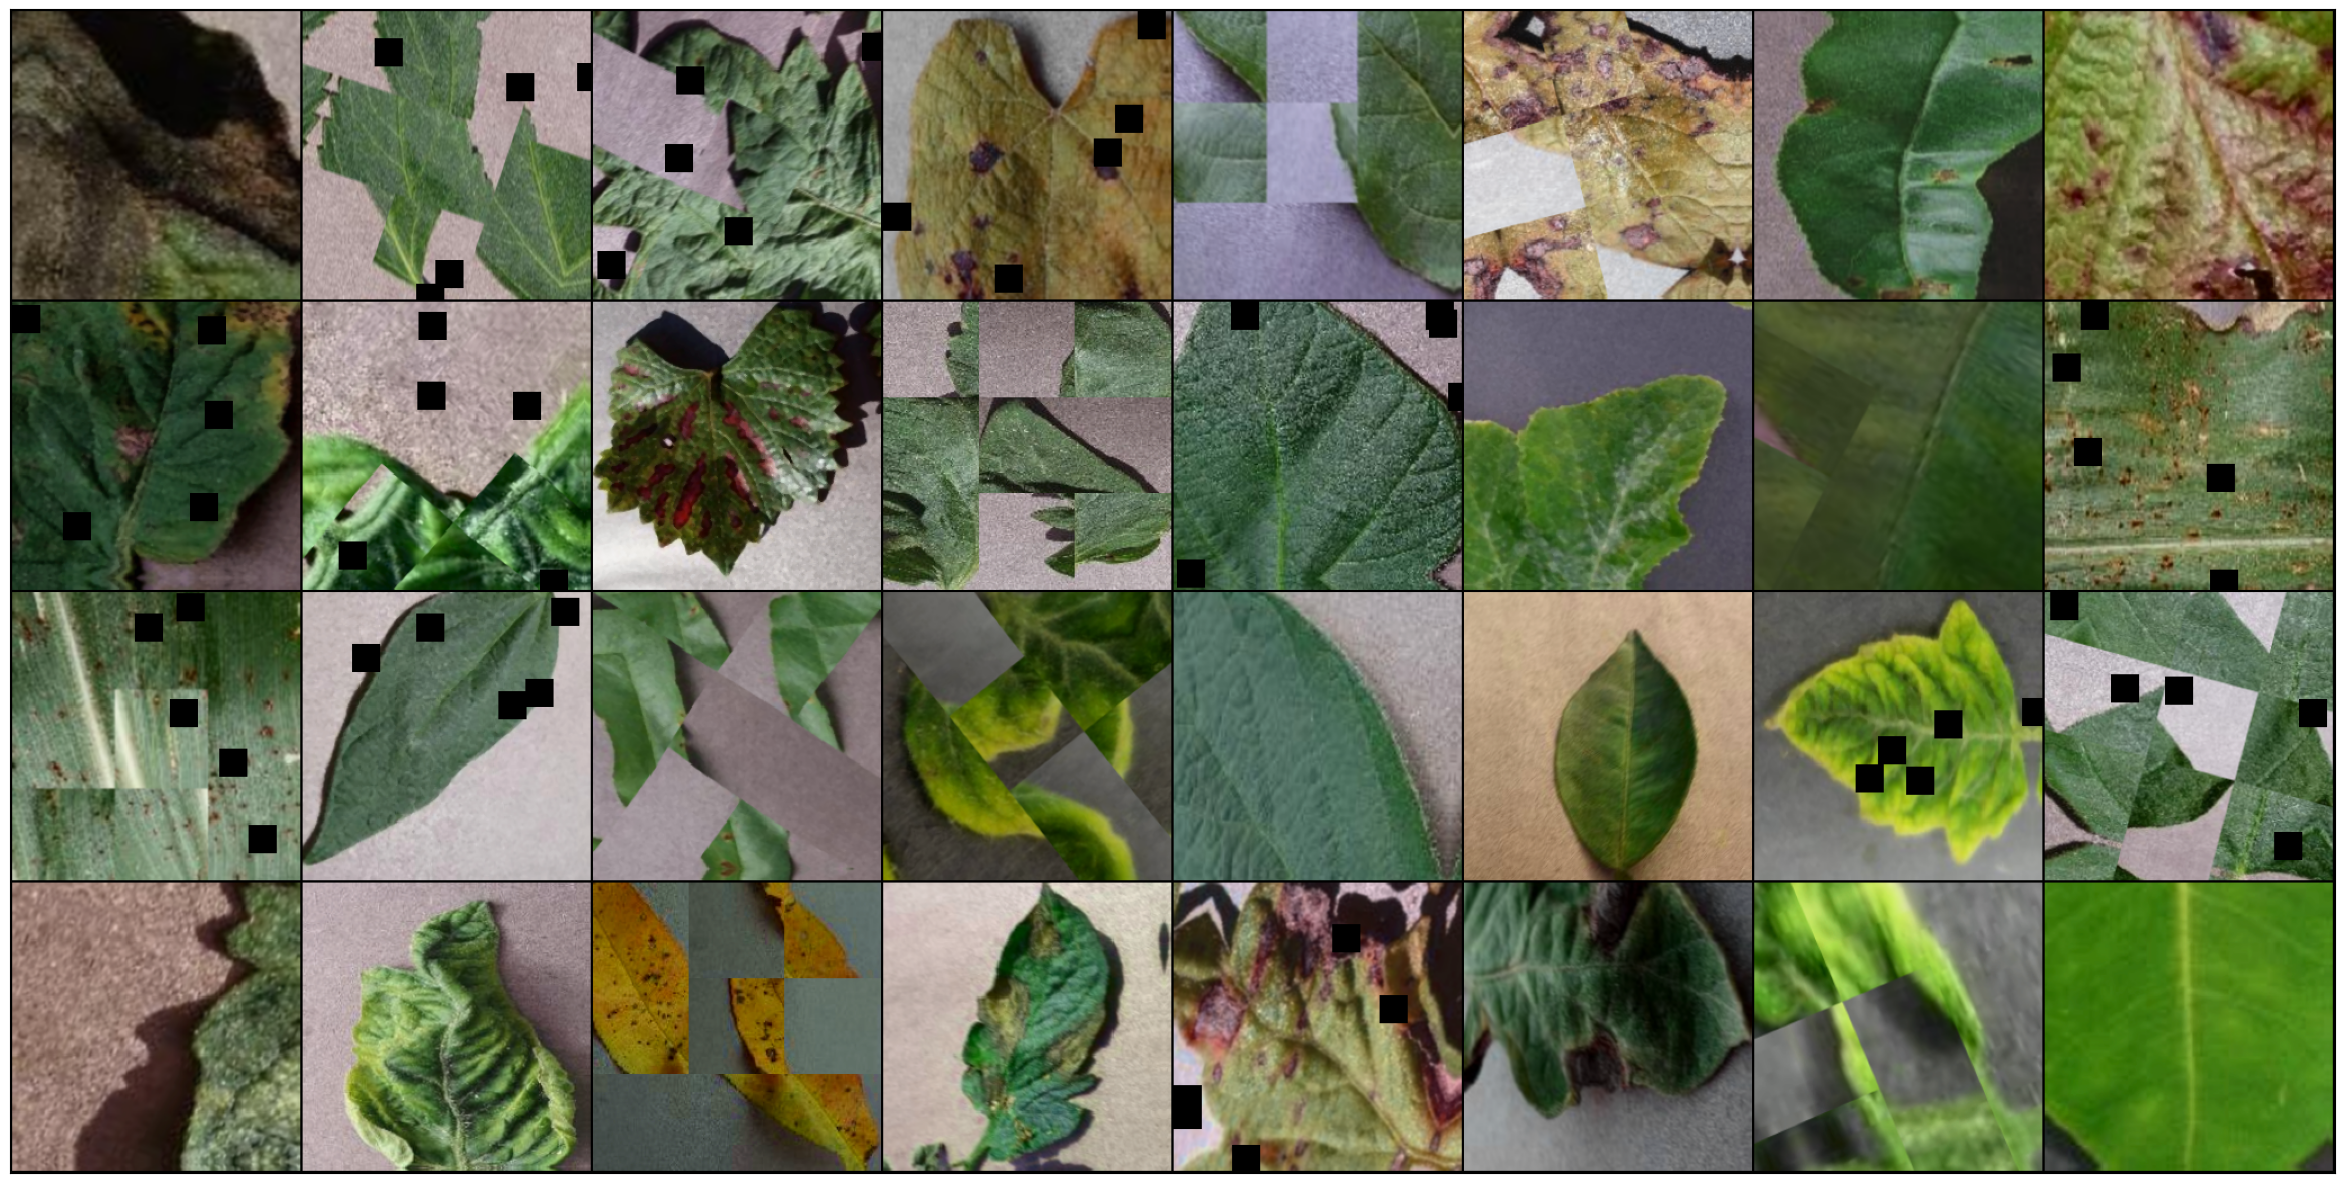

In [8]:
show_batch(train_loader) 